# Part I: Data Processing and Explanation
The data file can be downloaded from [FILL IN THE SOURCE]. The original format of the file contains all the Bart data from year [FILL IN] to year [FILL IN], each enclosed in a separate folder `FOLDER_NAME`. In the following section, we combine the monthly data into a single file and convert its format from `xlsx` into `csv` file. The file format conversion does not have any impact on the analysis, but made the data files readable with Jupyter Notebook. 

In [1]:
!pip install openpyxl
import pandas as pd
import os
# Import the Utility Functions
%run Util.ipynb

(2021, 5)
(2022, 4)


In [2]:
years = range(2001, 2023)

# Iterate over each year folder
# read it into a DataFrame, and append it to the combined data.
# then store it in a directory called Data_CSV
for year in years:
    combined_data = pd.DataFrame()
    directory = f"Data/ridership_{year}"
    for filename in os.listdir(directory):
        print(directory)
        if filename.endswith(".xlsx"):
            file_path = os.path.join(directory, filename)
        
        # Read all sheets of the XLSX file into a dictionary of DataFrames
        # Remember to remove the first row of the dataframe, 
        # which is the header column of the excel sheet
            xlsx_data = pd.read_excel(file_path, sheet_name=None, skiprows=1)
            for sheet_name, df in xlsx_data.items():
                # Add new columns with the sheet name, year and Month as the index value
                #2018-2022 Data Sheets' Naming Format:  Ridership_yyyymm.xlsx
                #2010-2017 Data Sheets' Naming Format: Ridership_Aprilyyyy.xlsx
                df['Sheet Name'] = sheet_name
                (year, month) = getMonthAndYear(filename)
                df['Year'] = year
                df['Month'] = month
                combined_data = pd.concat([combined_data, df], ignore_index=False)
    combined_data.rename(columns={"Unnamed: 0": "Exit Station"}, inplace=True)
    combined_data.to_csv(f"./Data_CSV/combined_data_{year}.csv", index=False)  

Data/ridership_2001
Data/ridership_2001
Data/ridership_2001
Data/ridership_2001
Data/ridership_2001
Data/ridership_2001
Data/ridership_2001
Data/ridership_2001
Data/ridership_2001
Data/ridership_2001
Data/ridership_2001
Data/ridership_2001
Data/ridership_2002
Data/ridership_2002
Data/ridership_2002
Data/ridership_2002
Data/ridership_2002
Data/ridership_2002
Data/ridership_2002
Data/ridership_2002
Data/ridership_2002
Data/ridership_2002
Data/ridership_2002
Data/ridership_2002
Data/ridership_2003
Data/ridership_2003
Data/ridership_2003
Data/ridership_2003
Data/ridership_2003
Data/ridership_2003
Data/ridership_2003
Data/ridership_2003
Data/ridership_2003
Data/ridership_2003
Data/ridership_2003
Data/ridership_2003
Data/ridership_2004
Data/ridership_2004
Data/ridership_2004
Data/ridership_2004
Data/ridership_2004
Data/ridership_2004
Data/ridership_2004
Data/ridership_2004
Data/ridership_2004
Data/ridership_2004
Data/ridership_2004
Data/ridership_2004
Data/ridership_2005
Data/ridership_2005


# Data Analyzing: Standard Deviation of Traffic

This part of the analysis focuses specfically on the standard deviation of the Traffic Data. The Standard Deviation is a statistical measure that quantifies the amount of dispersion or spread of a dataset around its mean. By analyzing the Standard Deviation of the Bart traffic data, we can gain insights into the degree of fluctuation in the number of commuters across different time interval.

## i. Standard Deviation of Exit Station: Weekday vs Weekends

In [42]:
import re 

years = range(2016, 2018)
def stdByWeekday(weekday):
    df = pd.DataFrame()
    for year in years:
        csv_file = f"./Data_CSV/combined_data_{year}.csv"
        single_df = pd.read_csv(csv_file)
        df = pd.concat([df, single_df], ignore_index=False)
    
    df = df[df['Exit Station'] != 'Entries']
    df = df[df['Sheet Name'].str.contains(weekday)]
    
    grouped_data = df.groupby('Exit Station')
    std_matrix = grouped_data.std()
    std_matrix = std_matrix.sort_index(axis=0)  # Sort rows
    std_matrix = std_matrix.sort_index(axis=1)  # Sort columns
    filtered_columns = [col for col in std_matrix.columns if len(col) == 2] # Filter out the Unnessary Columns
    std_matrix = std_matrix[filtered_columns]

    return std_matrix

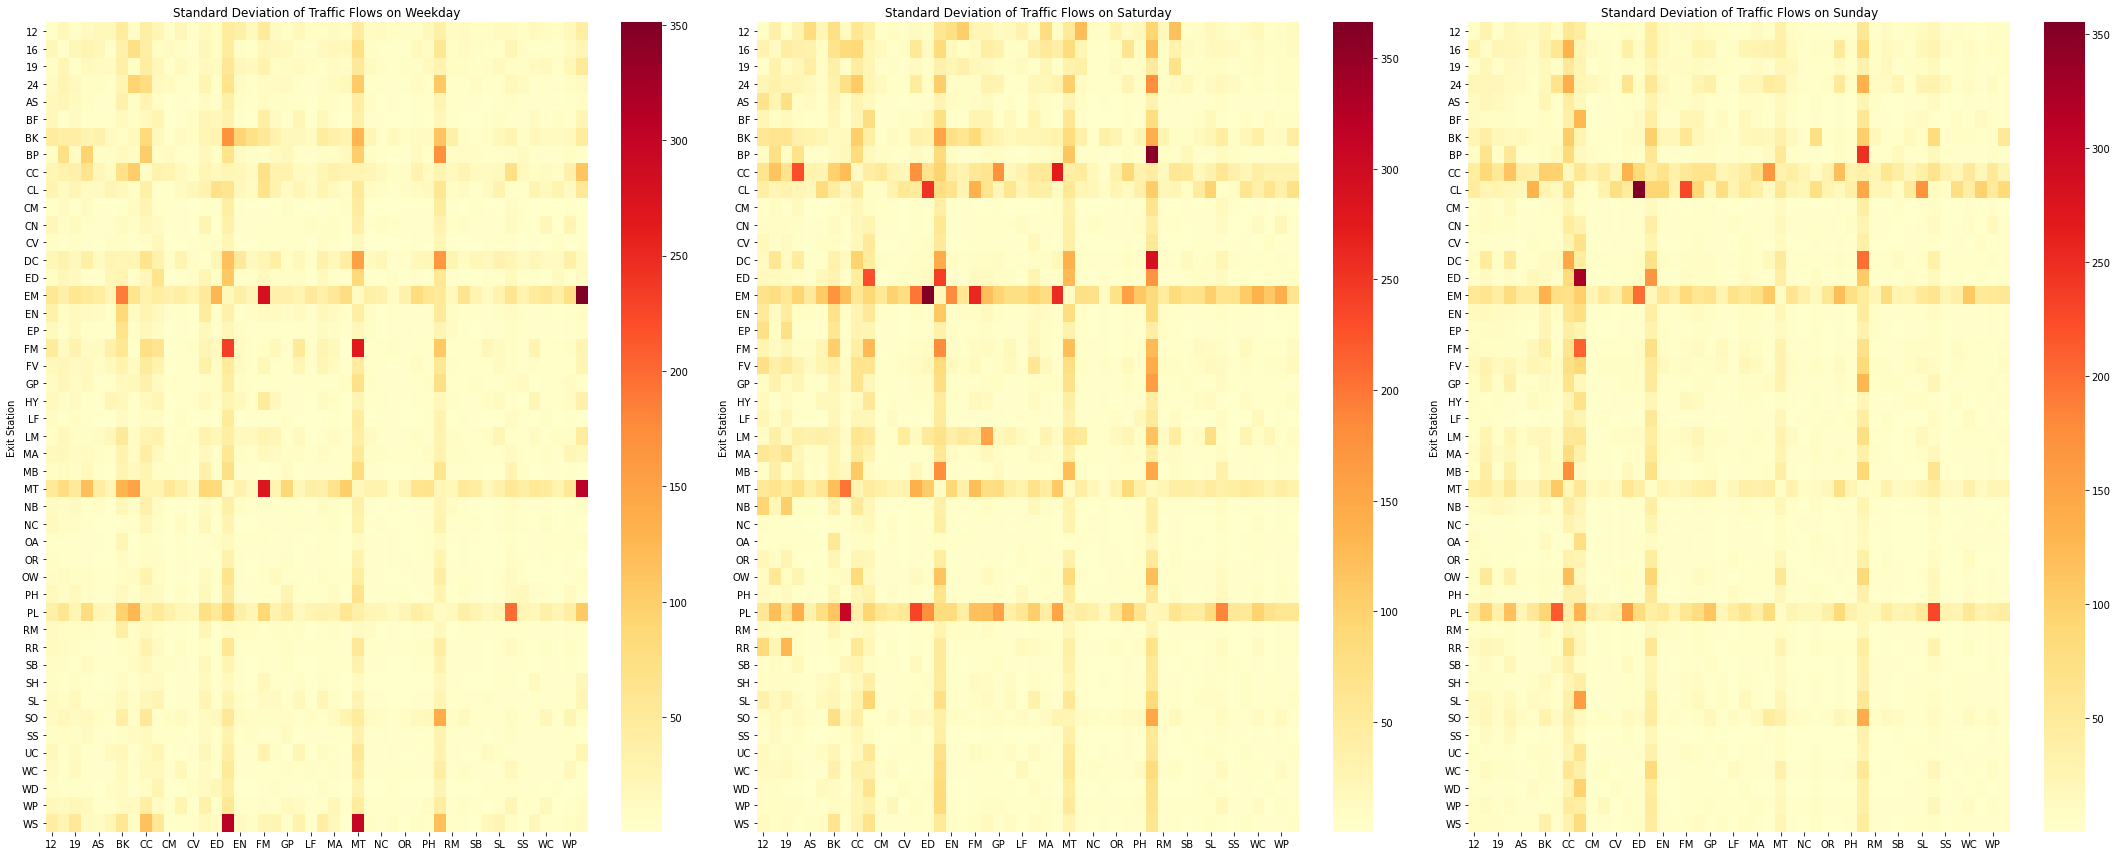

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

weekdays = ['Weekday', 'Saturday', 'Sunday']
dfs = [stdByWeekday(weekday) for weekday in weekdays]

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(30, 12))

# Iterate over each subplot and DataFrame to create the heat plots
for ax, df, weekday in zip(axes.flatten(), dfs, weekdays):
    sns.heatmap(df, cmap='YlOrRd', ax=ax)
    ax.set_title(f"Standard Deviation of Traffic Flows on {weekday}")

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


We can see here that Weekdays traffic has the least amount of dispersion while Saturday data has the most amount of dispersion. The difference in the standard deviation of traffic between weekdays and weekends can be attributed to several factors related to human behavior and routines.

1. Consistent Work/School Schedule: Weekdays typically follow a structured work or school schedule for a significant portion of the population. Commuters tend to have regular routines and predictable travel patterns, resulting in more consistent traffic patterns. This regularity leads to less variability in the number of commuters and subsequently a smaller standard deviation.

2. Reduced Commuter Variety: On weekends, the composition of commuters may vary significantly compared to weekdays. Weekends often see a mix of different activities such as leisure, recreation, and personal errands. This variety in commuter types and purposes can lead to a wider range of traffic patterns, resulting in a larger standard deviation.

3. Time Flexibility: On weekends, people often have more flexibility in choosing their travel times. This flexibility can lead to a more dispersed distribution of commuter traffic throughout the day, resulting in a higher standard deviation compared to weekdays when rush hours and specific work/school schedules dominate the traffic patterns.

4. Reduced Rush Hour Effects: Weekdays usually have distinct rush hours when a significant number of commuters travel to and from work or school simultaneously. These peak hours can create a more concentrated and predictable traffic flow, leading to a smaller standard deviation. On weekends, the absence or less pronounced rush hour effects can contribute to a higher standard deviation.

Overall, the combination of regular work/school schedules, reduced commuter variety, predictable rush hours, and the more structured nature of weekdays contributes to a smaller standard deviation in traffic. Conversely, the increased flexibility, variety of activities, and reduced rush hour effects on weekends tend to result in a larger standard deviation in traffic patterns.

Stations such as Civic Center(`CC`) and Embarcadero(`EM`) has a significant increase on fluctuation from Weekday plot to Weekends plot, which infers that these station are located at commerical areas with an inconsistent and flexable traffic flows. We will further investigate this idea and later use this piece of information later where we designate stations to different types of land use.

## ii. Which Stations have the most fluctant traffic?